# Indicaciones:
Luego, genera las siguientes visualizaciones, que deben poseer título, los ejes deben estar correctamente rotulados y deben tener leyenda:

- Dos scatterplots, los cuales comparan la relación entre glucosa e insulina y glucosa con presión arterial. Ambos scatterplots deben mostrar si el dato específico tiene o no diabetes.

- Dos diagramas de caja, donde se separan los pacientes en cuartiles según su edad y según si tienen o no diabetes, midiendo su nivel de glucosa y BMI (IMC).

- Dos diagramas de violín con las mismas separaciones anteriores, esta vez mostrando los datos de insulina y espesor de la piel.

- Un diagrama de torta, donde se separan a los pacientes en grupos de 10 años (21 a 30 años, 31 a 40 años, etc…) y se muestra la cantidad de pacientes en cada grupo.

- Un gráfico de múltiples ejes mostrando todos los datos, separando los casos con y sin diabetes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# funcion para discretizar variables en cuartiles
def cuartiles(df, variable):
    q1 = df[variable].quantile(0.25)
    q2 = df[variable].quantile(0.5)
    q3 = df[variable].quantile(0.75)
    cuartil = []
    for i in df[variable]:
        if i <= q1:
            cuartil.append(f'{int(df[variable].min())} - {int(q1)}')
        elif i <= q2:
            cuartil.append(f'{int(q1)} - {int(q2)}')
        elif i <= q3:
            cuartil.append(f'{int(q2)} - {int(q3)}')
        else:
            cuartil.append(f'{int(q3)} - {int(df[variable].max())}')

    
    
    df[f'Rangos_{variable}'] = cuartil
    orden_rangos = [f'{int(df[variable].min())} - {int(q1)}', f'{int(q1)} - {int(q2)}', f'{int(q2)} - {int(q3)}', f'{int(q3)} - {int(df[variable].max())}']
    df[f'Rangos_{variable}'] = pd.Categorical(df[f'Rangos_{variable}'], categories=orden_rangos, ordered=True)
    return df

# funcion de agrupacion de edad custom
def grupos_edad(df):
    grupos = []
    for i in df['Age']:
        if i < 20:
            grupos.append('Menor a 20 Años')
        elif i < 30:
            grupos.append('20-29 Años')
        elif i < 40:
            grupos.append('30-39 Años')
        elif i < 50:
            grupos.append('40-49 Años')
        elif i < 60:
            grupos.append('50-59 Años')
        elif i < 70:
            grupos.append('60-69 Años')
        else:
            grupos.append('Mayor a 70 Años')
    df['Grupo_Edad'] = grupos
    df['Grupo_Edad'] = pd.Categorical(df['Grupo_Edad'], categories=['Menor a 20 Años', '20-29 Años', '30-39 Años', '40-49 Años', '50-59 Años', '60-69 Años', 'Mayor a 70 Años'], ordered=True)
    return df

In [79]:
data = pd.read_csv('Diabetes_Tarea2.csv')
data['tiene_diabetes'] = pd.Categorical(data['Outcome'].apply(lambda x: 'Si' if x == 1 else 'No'),  categories=['No', 'Si'], ordered=True) # creo esta columna para fines de facilitar el entendimiento de la visualización
data = cuartiles(data, 'Age')
data = grupos_edad(data)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,tiene_diabetes,Rangos_Age,Grupo_Edad
0,6,148,72,35,0,33.6,0.627,50,1,Si,41 - 81,50-59 Años
1,1,85,66,29,0,26.6,0.351,31,0,No,29 - 41,30-39 Años
2,8,183,64,0,0,23.3,0.672,32,1,Si,29 - 41,30-39 Años
3,1,89,66,23,94,28.1,0.167,21,0,No,21 - 24,20-29 Años
4,0,137,40,35,168,43.1,2.288,33,1,Si,29 - 41,30-39 Años


# 1 Scatterplots

## 1.1 Glucosa vs Insulina

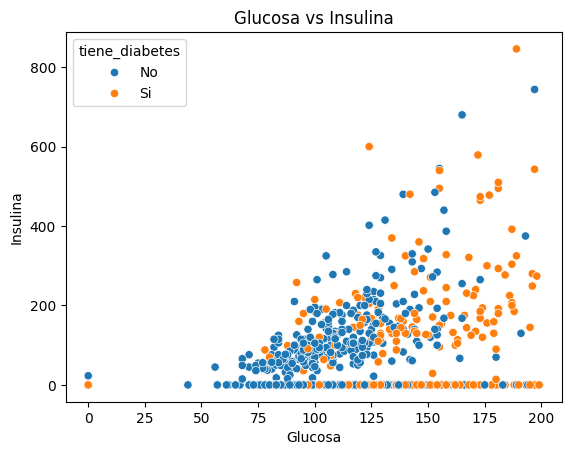

In [31]:
sns.scatterplot(x='Glucose', y='Insulin', hue='tiene_diabetes', data=data)
plt.title('Glucosa vs Insulina')
plt.xlabel('Glucosa')
plt.ylabel('Insulina')
plt.show()

## 1.2 Glucosa vs Presión Arterial

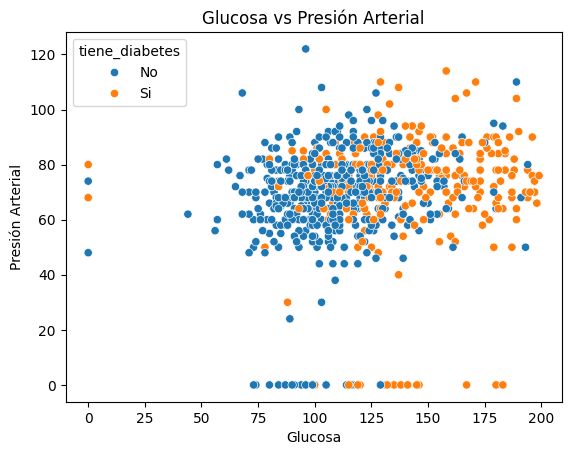

In [32]:
sns.scatterplot(x='Glucose', y='BloodPressure', hue='tiene_diabetes', data=data)
plt.title('Glucosa vs Presión Arterial')
plt.xlabel('Glucosa')
plt.ylabel('Presión Arterial')
plt.show()

# 2 Diagramas de caja o boxplots

## 2.1 Glucosa

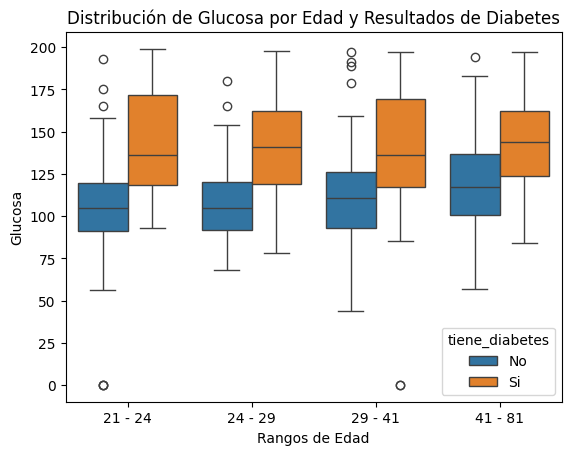

In [45]:
sns.boxplot(x='Rangos_Age', y='Glucose', hue='tiene_diabetes', data=data)
plt.title('Distribución de Glucosa por Edad y Resultados de Diabetes')
plt.xlabel('Rangos de Edad')
plt.ylabel('Glucosa')
plt.show()

## 2.2 BMI

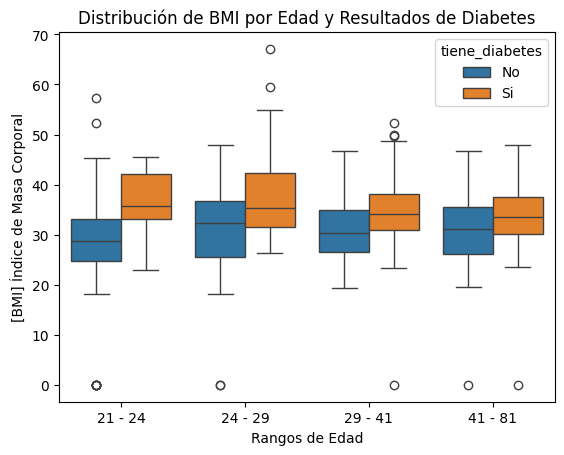

In [44]:
sns.boxplot(x='Rangos_Age', y='BMI', hue='tiene_diabetes', data=data)
plt.title('Distribución de BMI por Edad y Resultados de Diabetes')
plt.xlabel('Rangos de Edad')
plt.ylabel('[BMI] Índice de Masa Corporal')
plt.show()

# 3 Violinplots

## 3.1 Insulina

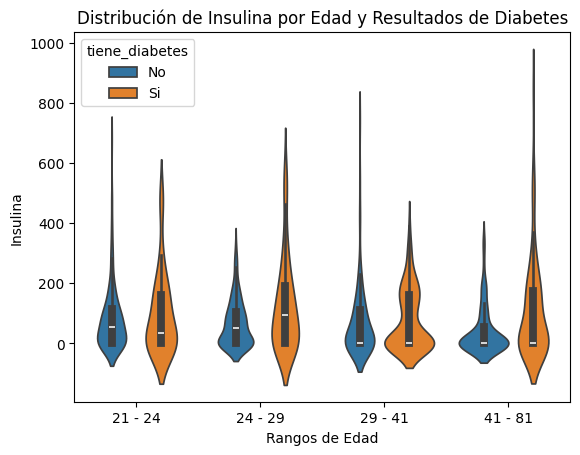

In [43]:
sns.violinplot(x='Rangos_Age', y='Insulin', hue='tiene_diabetes', data=data)
plt.title('Distribución de Insulina por Edad y Resultados de Diabetes')
plt.xlabel('Rangos de Edad')
plt.ylabel('Insulina')
plt.show()

## 3.2 Espesor de piel

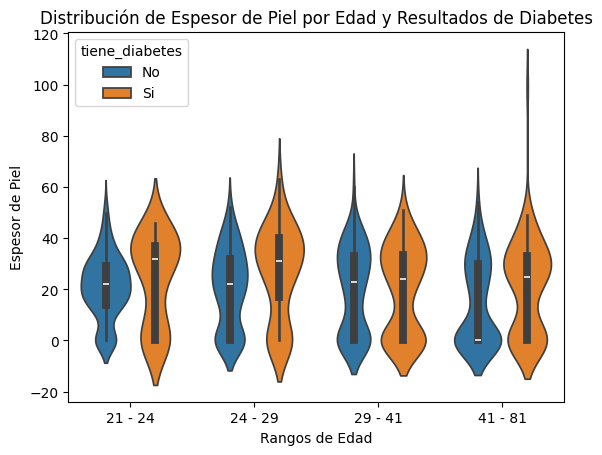

In [42]:
sns.violinplot(x='Rangos_Age', y='SkinThickness', hue='tiene_diabetes', data=data)
plt.title('Distribución de Espesor de Piel por Edad y Resultados de Diabetes')
plt.xlabel('Rangos de Edad')
plt.ylabel('Espesor de Piel')
plt.show()

# 4 Diagrama de torta

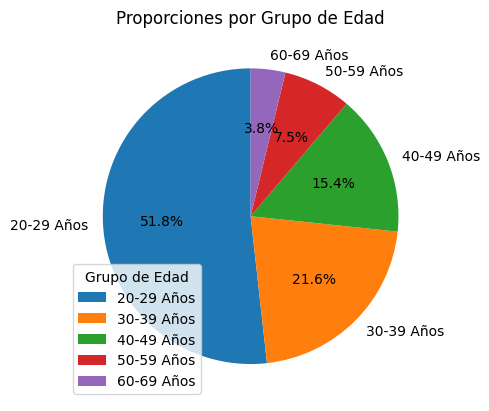

In [82]:
plt.pie(data['Grupo_Edad'].value_counts().head(5), labels=data['Grupo_Edad'].value_counts().head(5).index, autopct='%1.1f%%', startangle=90)
plt.title('Proporciones por Grupo de Edad')
plt.legend(title='Grupo de Edad')
plt.show()

# Gráfico de múltiples ejes

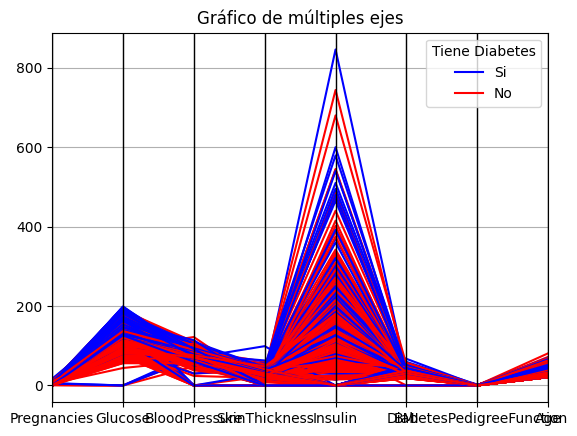

In [95]:
from pandas.plotting import parallel_coordinates
ax = parallel_coordinates(
    data,
    'tiene_diabetes', cols=[i for i in data.columns if i not in ['Outcome', 'tiene_diabetes', 'Grupo_Edad', 'Rangos_Age']],
    color=['blue', 'red'])
ax.set_title('Gráfico de múltiples ejes')
ax.legend(title='Tiene Diabetes')
plt.show()



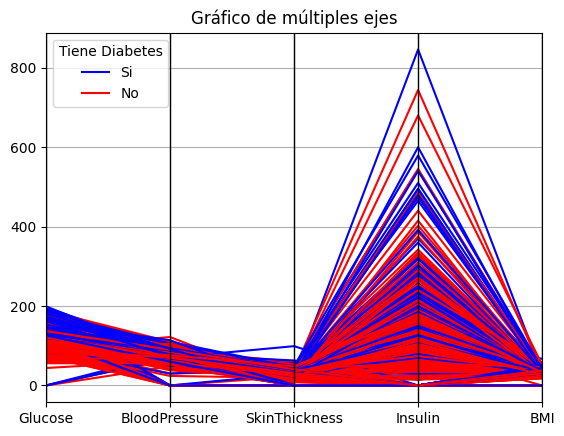

In [96]:
from pandas.plotting import parallel_coordinates
ax = parallel_coordinates(
    data,
    'tiene_diabetes', cols=[i for i in data.columns if i in ['Glucose', 'Insulin', 'BloodPressure', 'SkinThickness', 'BMI']],
    color=['blue', 'red'])
ax.set_title('Gráfico de múltiples ejes')
ax.legend(title='Tiene Diabetes')
plt.show()